In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wnba = pd.read_csv('WNBA Stats.csv')

In [3]:
# Converting to ordinal scale from ratio scale(discrete)
def experienced(value):
    if value == 'R':
        return 'Rookie'
    if 1 <= int(value) <= 3:
        return 'Little experience'
    if 3 < int(value) <= 5:
        return 'Experienced'
    if 5 < int(value) <= 10:
        return 'Very experienced'
    else:
        return 'Veteran'

wnba['Exp_ordinal'] = wnba['Experience'].apply(experienced)

## 1. Comparing Frequency Distributions

In [4]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n',
      very_xp_distro, '\n\n', veteran_distro)

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 

 G      16
C       6
F       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


## 2. Grouped Bar Plots

<AxesSubplot:xlabel='Exp_ordinal', ylabel='count'>

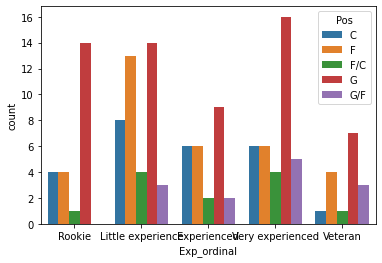

In [11]:
# Exp_ordinal : ordinal, Pos: nominal
sns.countplot(x='Exp_ordinal',hue='Pos',data=wnba,order = ['Rookie','Little experience', 
                                            'Experienced','Very experienced','Veteran'],hue_order=['C','F','F/C', 'G', 'G/F'])

## 3. Compare 

In [39]:
print(wnba['MIN'].mean())

496.97202797202794


In [12]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

<AxesSubplot:xlabel='age_mean_relative', ylabel='count'>

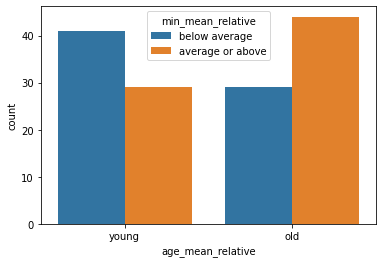

In [38]:
# ordinal
sns.countplot(x = 'age_mean_relative', hue= 'min_mean_relative',data=wnba)

## 4. Comparing Histograms

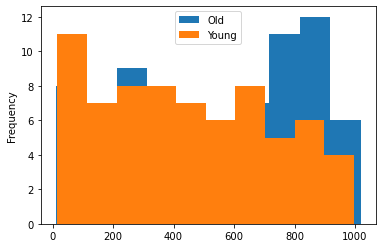

In [35]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)
plt.show()

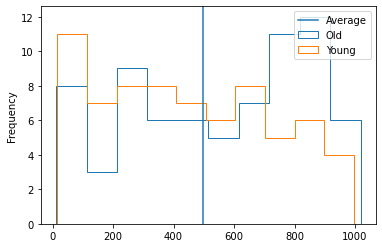

In [14]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

## 5. Kernel Density Estimate Plots

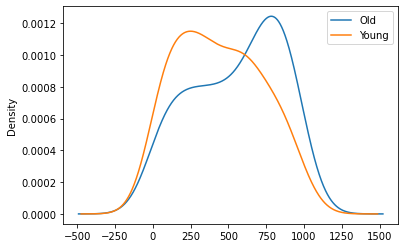

In [36]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.show()

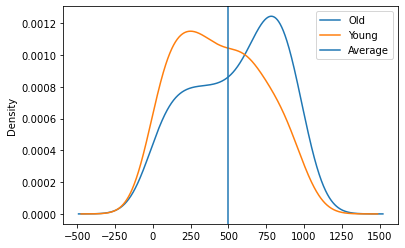

In [23]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497,label = 'Average')
plt.legend()
plt.show()

## 6. Drawbacks of Kernel Density Plots

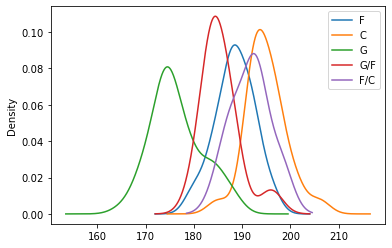

In [37]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)
plt.show()

## 7. Strip Plots

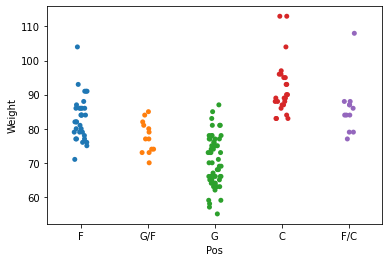

In [40]:
# Pos: nominal, Weight: ratio
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

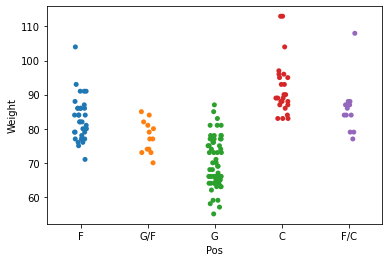

In [29]:
sns.stripplot(x='Pos',y='Weight',data=wnba,jitter=True)
plt.show()

## 8. Box plots

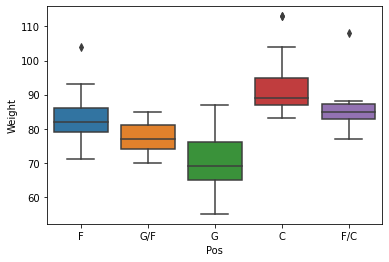

In [41]:
# Pos: nominal, Weight: ratio
sns.boxplot(x='Pos',y='Weight',data=wnba)
plt.show()

## 9. Outliers

In [42]:
# ratio
print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [48]:
iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)

In [46]:
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_low

12

In [47]:
outliers_high = sum(wnba['Games Played'] > upper_bound)
outliers_high

0

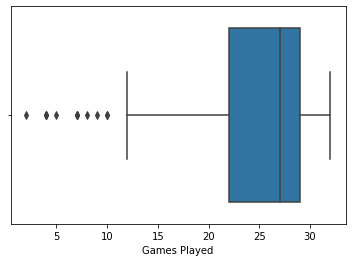

In [43]:
sns.boxplot(x='Games Played',data=wnba)
plt.show()